# package_DBR

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
from importlib import reload

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode
import package_LAB
from package_LAB import LEADLAG_RT,PID_RT
package_LAB = reload(package_LAB)


# FO_RT()

In [33]:
help(LEADLAG_RT)

Help on function LEADLAG_RT in module package_LAB:

LEADLAG_RT(MV, Kp, Tlead, Tlag, Ts, PV, PVInit=0, method='EBD')
    The function "LL_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :Tlead: lead time constant [s]
    :Tlag: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    "LL_RT" = Lead-lag real-time
    The function "LL_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0.0, 100.0)

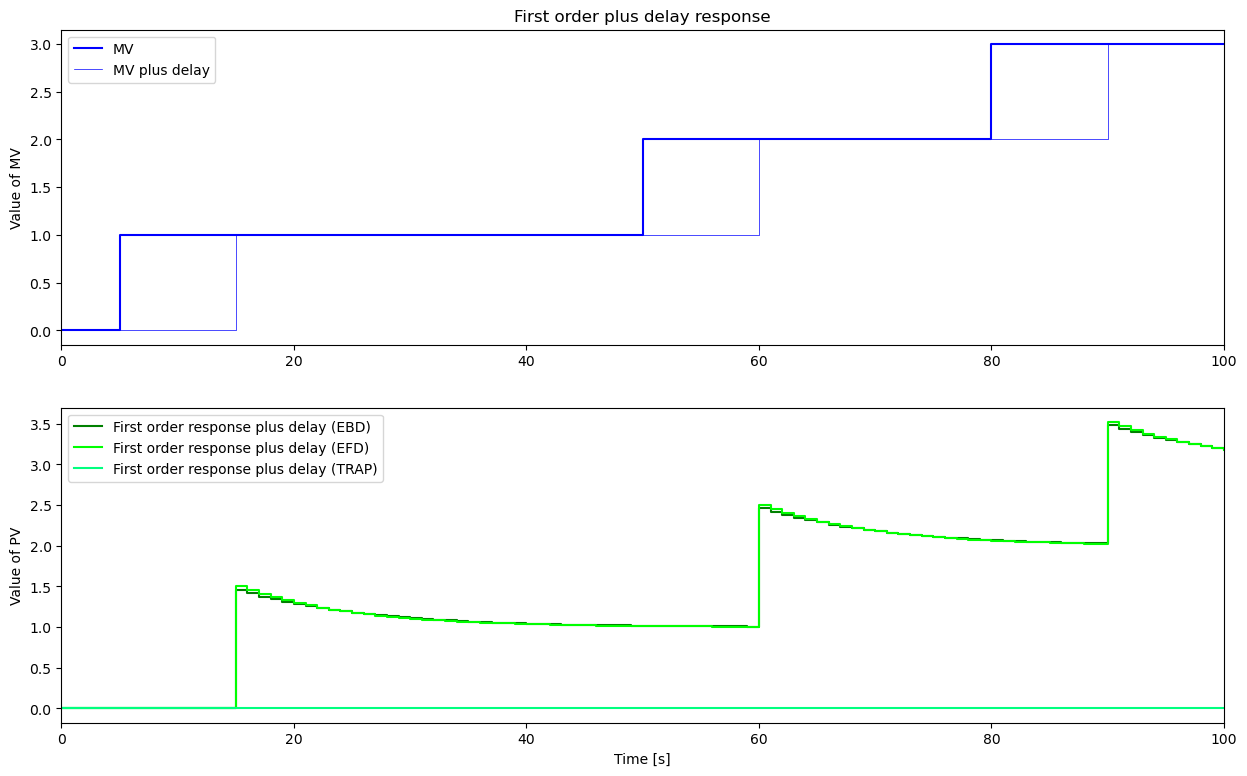

In [34]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlead = 15
Tlag = 10
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LEADLAG_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EBD)
    LEADLAG_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EFD,0,'EFD')
    LEADLAG_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='First order response plus delay (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='First order response plus delay (EFD)',where='post')
plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

In [35]:
help(PID_RT)

Help on function PID_RT in module package_LAB:

PID_RT(SP, E, MV, MVP, MVI, MVD, MVMan, MVmin, MVmax, PV, Ts, Kc, Ti, Td, alpha, E_init=0, man_mode=False, method='EBD')
    The function "PID_RT" needs to be included in a "for or while loop".
    
    :SP: Setpoint
    :E: Control error vector
    :MV: Manipulated value vector
    :MVP: Proportional action vector
    :MVI: Integrating action vector
    :MVD: Derivative action vector
    :MVFF: Feed Forward action vector
    :MVMan: Manual value vector
    :MVmin: Minimum MV value
    :MVmax: Maximum MV value
    :PV: Process value vector
    :Ts: sampling period [s]
    :Kc: gain
    :Ti: Integral time constant
    :td: Derivative time constant
    :alpha: derivative filter smoothing factor
    :E_init: initial error value (optional: default value is 0)
    :man_mode: manual mode flag (optional: default value is False)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        TR

(0.0, 65.0)

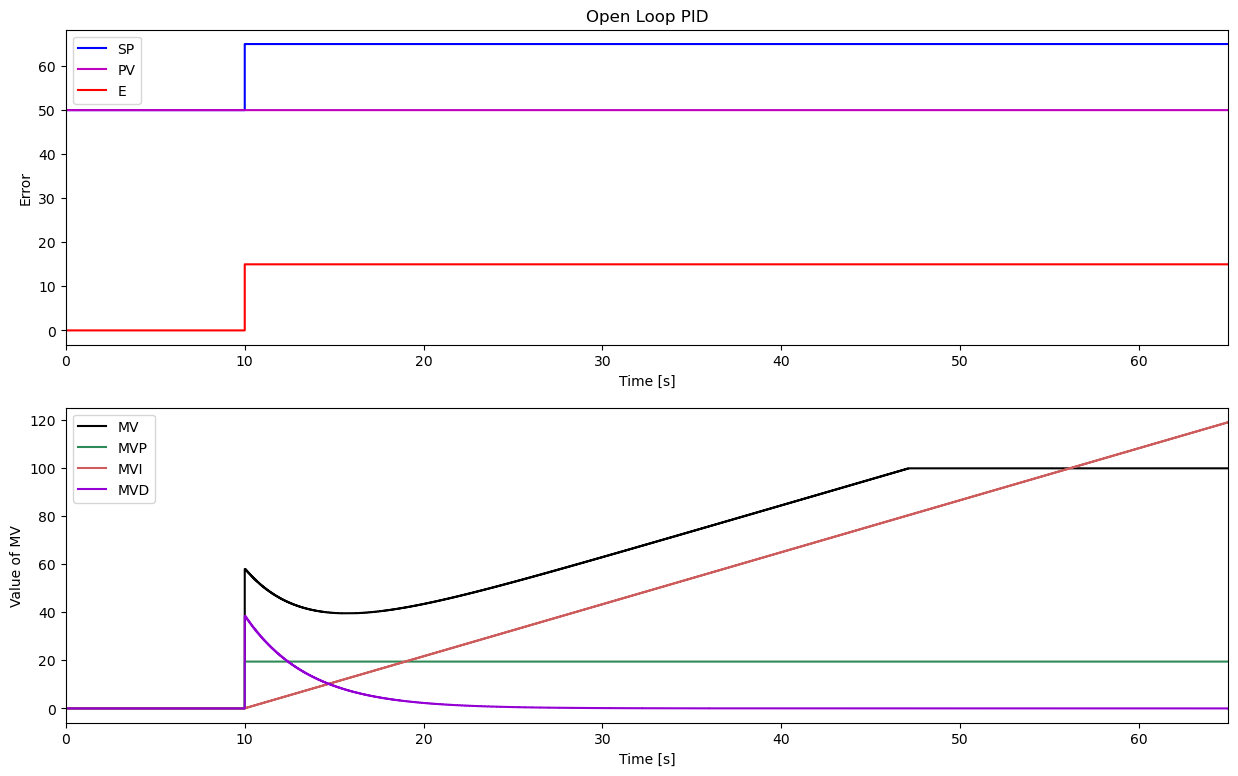

In [53]:
TSim = 65
Ts = 0.05
N = int(TSim/Ts) + 1

# Path for MV
SPPath = {0: 50, 10: 65, TSim: 65}
PVPath = {0: 50, 10: 50, TSim: 50}

t = []
SP = []
E = []
MV = []
MVP = []
MVI = []
MVD = []
MVMan = []
MVmin = 0
MVmax = 100
PV = []
Kc = 1.3
Ti = 9
Td = 7
alpha = 0.5

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    PID_RT(SP, E, MV, MVP, MVI, MVD, MVMan, MVmin, MVmax, PV, Ts, Kc, Ti, Td, alpha)

plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.title('Open Loop PID')
plt.step(t,SP,'b-',label='SP',where='post')
plt.step(t,PV,'m-',label='PV',where='post')
plt.step(t,E,'r-',label='E',where='post')
plt.ylabel('Error')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,MV,'black',label='MV',where='post')
plt.step(t,MVP,'seagreen',label='MVP',where='post')
plt.step(t,MVI,'indianred',label='MVI',where='post')
plt.step(t,MVD,'darkviolet',label='MVD',where='post')
plt.ylabel('Value of MV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    